<a href="https://colab.research.google.com/github/Inno732/Data-Mining-Project-Jerome-Inno/blob/main/DataMining08/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
%cd drive/MyDrive/Data_Mining/Classification/Sign_MNIST

/content/drive/MyDrive/Data_Mining/Classification/Sign_MNIST


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [10]:
X = np.load('./X.npy')
y = np.load('./Y.npy')
img_size =  64

X = X.reshape(len(X), 64*64)  # mise à plat de l'image

In [11]:
#%% equivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y_ = np.zeros(len(y))
for k in range(len(y)):
    a = y[k]
    y_[k] = int(dic_equiv[np.where(a==1)[0][0]])
print(y_)
y_ = y_.astype(int)



[9. 9. 9. ... 5. 5. 5.]


<ipython-input-12-b9a1c12e51f8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


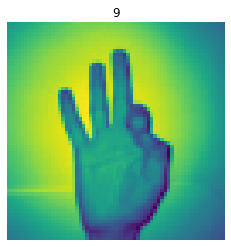

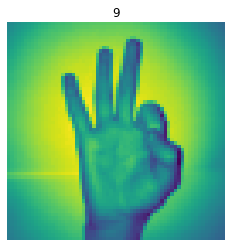

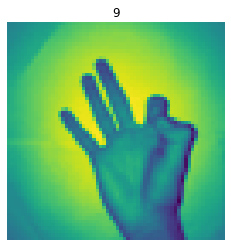

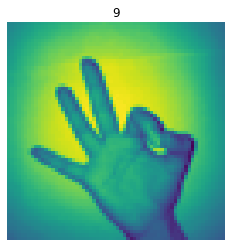

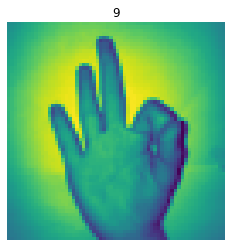

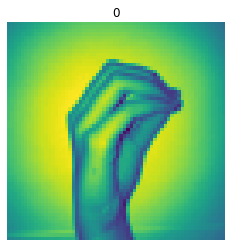

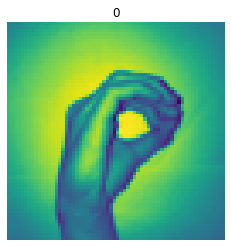

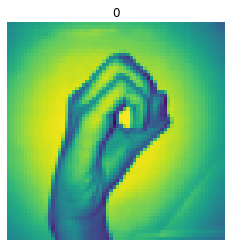

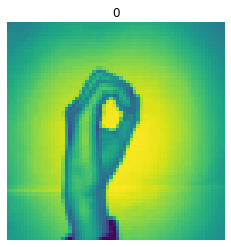

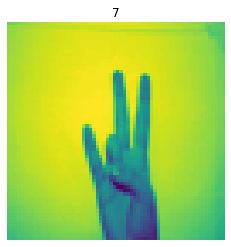

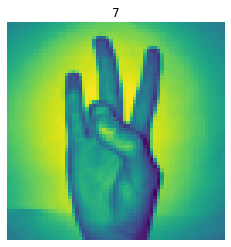

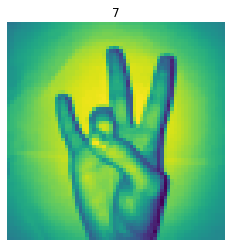

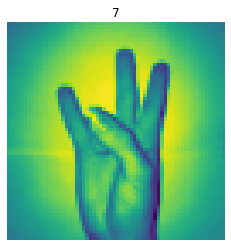

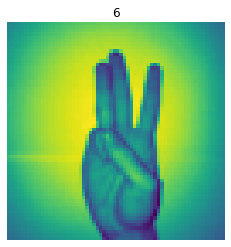

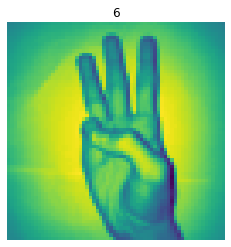

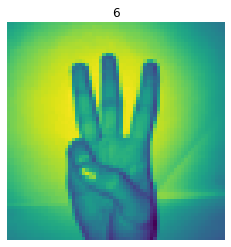

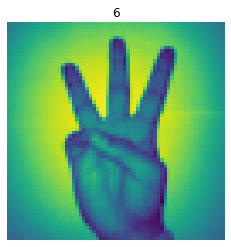

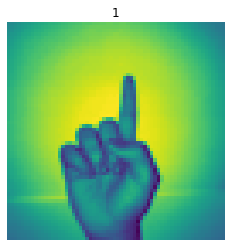

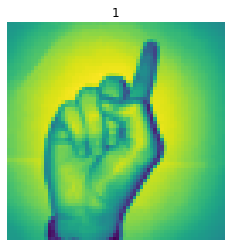

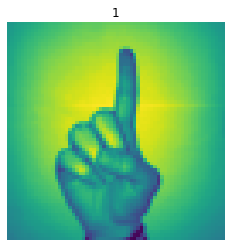

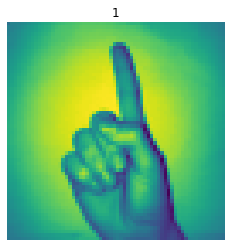

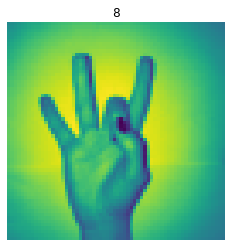

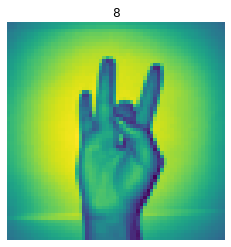

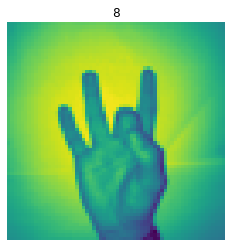

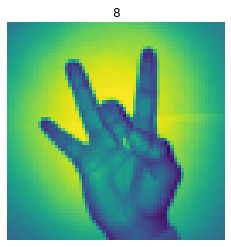

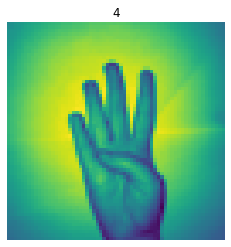

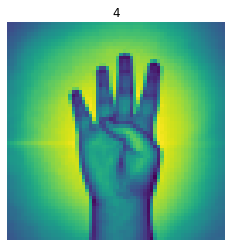

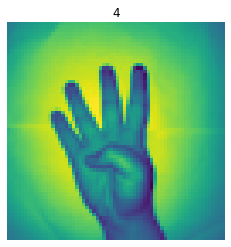

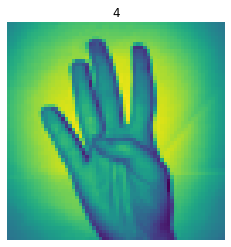

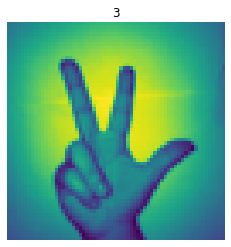

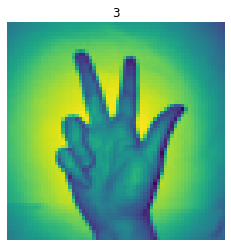

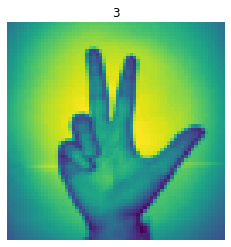

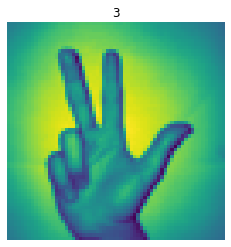

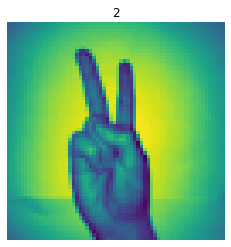

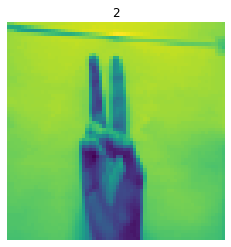

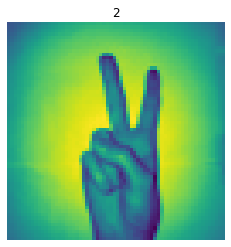

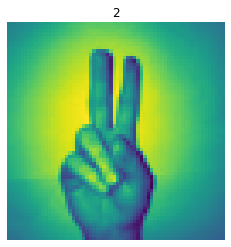

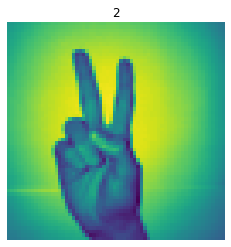

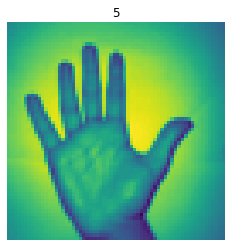

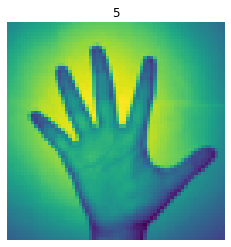

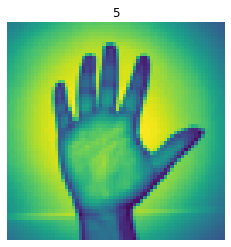

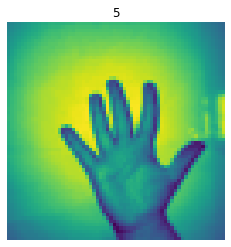

In [12]:
#%% Affichage
for i in range(1, len(y), 50):
    plt.figure()
    plt.imshow(X[i].reshape(img_size, img_size))
    plt.title(y_[i])
    plt.axis('off')


In [13]:
    #%% Creation du dataframe
df = pd.DataFrame(X)
df['Value']=y_
print(df.head)


<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0     0.466667  0.474510  0.478431  0.482353  0.486275  0.490196  0.494118   
1     0.596078  0.607843  0.619608  0.631373  0.643137  0.647059  0.658824   
2     0.588235  0.603922  0.619608  0.631373  0.643137  0.654902  0.666667   
3     0.556863  0.568627  0.584314  0.600000  0.611765  0.619608  0.627451   
4     0.580392  0.576471  0.592157  0.607843  0.615686  0.635294  0.643137   
...        ...       ...       ...       ...       ...       ...       ...   
2057  0.454902  0.466667  0.478431  0.490196  0.505882  0.513726  0.529412   
2058  0.541176  0.556863  0.568627  0.572549  0.588235  0.600000  0.607843   
2059  0.525490  0.545098  0.556863  0.564706  0.572549  0.576471  0.580392   
2060  0.513726  0.525490  0.537255  0.549020  0.560784  0.576471  0.592157   
2061  0.929412  0.937255  0.937255  0.945098  0.941176  0.945098  0.945098   

             7         8         

In [14]:
from sklearn.model_selection import train_test_split

#%% Define training and testing sets
X = df.drop(labels = 'Value', axis=1).values
y = df['Value'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#**Random Forest**

In [15]:
RFC = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(RFC, X_train, y_train, cv=5)
print(scores.mean())


0.645246384820853


In [16]:
RFC = RandomForestClassifier(n_estimators=20, random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [17]:
RFC.score(X_test, y_test)

0.7506053268765133

In [18]:
pred_RFC=RFC.predict(X_test)
print(classification_report(y_test, pred_RFC)) # rapport qui explique tout sur la classification

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        45
           1       0.71      0.85      0.78        47
           2       0.70      0.77      0.73        39
           3       0.82      0.77      0.80        43
           4       0.64      0.63      0.64        46
           5       0.79      0.86      0.83        36
           6       0.78      0.61      0.68        41
           7       0.76      0.70      0.73        40
           8       0.82      0.74      0.78        43
           9       0.79      0.79      0.79        33

    accuracy                           0.75       413
   macro avg       0.76      0.75      0.75       413
weighted avg       0.75      0.75      0.75       413



precision(i) = $\frac{VP(i)}{VP(i) + FP(i)}$\
recall(i) = $\frac{VP(i)}{VP(i) + FN(i)}$\
support(i) = nombre d'individu de la classe i 

Matrice de confusion

#**SVM**

## ACP afin de conserver 95% de l' information

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True, random_state=42)
X = pca.fit_transform(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
print(X)

[[-0.82865883 -0.21201141 -2.76473584 ... -1.34604969  0.59736432
   0.311304  ]
 [-1.51203376  0.45101156 -0.38122597 ...  0.97205447 -0.82983903
   1.02455109]
 [-1.61528981  0.41489262 -0.00670024 ...  0.51184235  0.65506314
   0.70046415]
 ...
 [-0.50360637 -0.70163229 -1.19898316 ...  0.85220808  0.74302397
  -1.61711621]
 [-0.01004883 -0.45542895 -1.34139329 ...  1.62599336  0.87473137
   2.35586823]
 [ 0.6501359   1.91670194 -2.31997456 ... -0.26754836 -0.19701478
  -0.67335396]]


In [21]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
SVC = SVC(kernel='rbf')

# traininf the model
SVC.fit(X_train, y_train)

SVC()

In [22]:
SVC.score(X_test, y_test)

0.847457627118644

In [23]:
pred_SVC=SVC.predict(X_test)
print(classification_report(y_test, pred_SVC)) # rapport qui explique tout sur la classification

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.90      0.91      0.91        47
           2       0.84      0.82      0.83        39
           3       1.00      0.93      0.96        43
           4       0.77      0.74      0.76        46
           5       0.86      0.89      0.88        36
           6       0.78      0.85      0.81        41
           7       0.78      0.78      0.78        40
           8       0.80      0.77      0.79        43
           9       0.86      0.91      0.88        33

    accuracy                           0.85       413
   macro avg       0.85      0.85      0.85       413
weighted avg       0.85      0.85      0.85       413



In [24]:
from sklearn.svm import SVC

""""clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))"""
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
clf.score(X_test, y_test)

0.8159806295399515

In [26]:
pred_clf=clf.predict(X_test)
print(classification_report(y_test, pred_clf)) # rapport qui explique tout sur la classification

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.78      0.91      0.84        47
           2       0.77      0.85      0.80        39
           3       0.97      0.86      0.91        43
           4       0.71      0.74      0.72        46
           5       0.86      0.86      0.86        36
           6       0.77      0.88      0.82        41
           7       0.76      0.62      0.68        40
           8       0.83      0.67      0.74        43
           9       0.89      0.94      0.91        33

    accuracy                           0.82       413
   macro avg       0.82      0.82      0.82       413
weighted avg       0.82      0.82      0.81       413



#**Reseau de Neuronnes**

In [27]:
# verification de la taille et du format des données
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(1649, 4096)
(1649,)
(413, 4096)
(413,)


In [28]:
# normalisation des données
x_train=X_train.astype('float64')/255
x_test=X_test.astype('float64')/255

In [29]:
from keras.utils import np_utils

# convertion des données (labels) vers le format "One-hot-encoding"

nb_classes=10
y_train= np_utils.to_categorical(y_train, nb_classes)
y_test= np_utils.to_categorical(y_test, nb_classes)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

# Model 1 avec une couche cachée de 10 neuronne
model1=Sequential()
model1.add (Dense(10,input_dim=4096))
model1.add(Activation('softmax'))

In [31]:
import tensorflow as tf

# compiler le model
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [32]:
# Entrainer le modèle (80% de données pour l'entrainement et 20% pour la validation)
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=7)

Epoch 1/7
42/42 [==============================] - 1s 12ms/step - loss: 2.7402 - categorical_accuracy: 0.1319 - false_negatives: 1314.0000 - val_loss: 2.2386 - val_categorical_accuracy: 0.1242 - val_false_negatives: 330.0000
Epoch 2/7
42/42 [==============================] - 0s 5ms/step - loss: 2.2361 - categorical_accuracy: 0.2373 - false_negatives: 1291.0000 - val_loss: 2.0743 - val_categorical_accuracy: 0.3818 - val_false_negatives: 312.0000
Epoch 3/7
42/42 [==============================] - 0s 6ms/step - loss: 1.9589 - categorical_accuracy: 0.3563 - false_negatives: 1274.0000 - val_loss: 1.9595 - val_categorical_accuracy: 0.3424 - val_false_negatives: 316.0000
Epoch 4/7
42/42 [==============================] - 0s 6ms/step - loss: 1.8099 - categorical_accuracy: 0.3836 - false_negatives: 1182.0000 - val_loss: 1.7800 - val_categorical_accuracy: 0.3364 - val_false_negatives: 313.0000
Epoch 5/7
42/42 [==============================] - 0s 4ms/step - loss: 1.6050 - categorical_accuracy: 0

In [33]:
# Tester le modele avec les donnees de test
model1.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 1.3815 - categorical_accuracy: 0.5956 - false_negatives: 315.0000


[1.3815124034881592, 0.5956416726112366, 315.0]

In [34]:
# construction du model2 avec plusieurs couche cachée

model = Sequential()
model.add( Dense(200, input_dim=x_train.shape[1], activation='sigmoid'))
model.add( Dense(100, input_dim=200, activation='sigmoid'))
model.add( Dense(60, input_dim=100, activation='sigmoid'))
model.add( Dense(30, input_dim=60, activation='sigmoid'))
model.add( Dense(nb_classes, activation='softmax'))

In [35]:
# Afficher les scores et courbes d'apprentissages.

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
42/42 [==============================] - 2s 17ms/step - loss: 0.5125 - categorical_accuracy: 0.0963 - false_negatives_1: 1319.0000 - val_loss: 0.3981 - val_categorical_accuracy: 0.1152 - val_false_negatives_1: 330.0000
Epoch 2/5
42/42 [==============================] - 0s 10ms/step - loss: 0.3626 - categorical_accuracy: 0.0970 - false_negatives_1: 1319.0000 - val_loss: 0.3394 - val_categorical_accuracy: 0.1152 - val_false_negatives_1: 330.0000
Epoch 3/5
42/42 [==============================] - 0s 12ms/step - loss: 0.3324 - categorical_accuracy: 0.0970 - false_negatives_1: 1319.0000 - val_loss: 0.3282 - val_categorical_accuracy: 0.1030 - val_false_negatives_1: 330.0000
Epoch 4/5
42/42 [==============================] - 0s 11ms/step - loss: 0.3266 - categorical_accuracy: 0.0940 - false_negatives_1: 1319.0000 - val_loss: 0.3260 - val_categorical_accuracy: 0.1030 - val_false_negatives_1: 330.0000
Epoch 5/5
42/42 [==============================] - 0s 11ms/step - loss: 0.3255 - cat

In [36]:
# Tester le modele avec les donnees de test
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 0.3256 - categorical_accuracy: 0.0799 - false_negatives_1: 413.0000


[0.32560622692108154, 0.07990314811468124, 413.0]